In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('ticks',  {'font.family': 'sans-serif'})
sns.set_context("talk")
#deep, muted, pastel, bright, dark, colorblind
sns.set_palette('deep')

current_palette = sns.color_palette()

blue = current_palette[0]
green =current_palette[1]
red = current_palette[2]
purple = current_palette[3]
orange = current_palette[4]
l_blue = current_palette[5]

%matplotlib inline

In [2]:
chainName = 'chain_conMock0_6000steps.npy'
#chainName = 'chain_conMock5_6000steps.npy'

chain = np.load(chainName)
print chain.shape

(6000, 5)


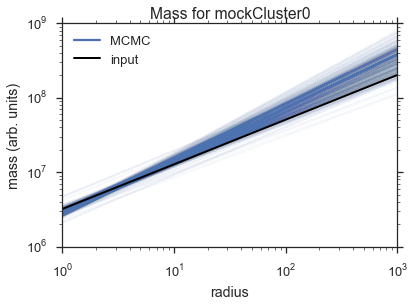

In [3]:
radii = np.logspace(0,3,20)

def generateMassProfile(radii,sigma0,m,k):
    return -radii*(sigma0*radii**(-m))**2*(-k-m)

for i in chain[4999:5000]:
    plt.plot(radii,generateMassProfile(radii,i[2],i[3],i[1]),color=blue,label='MCMC')

for i in chain[5000:]:
    plt.plot(radii,generateMassProfile(radii,i[2],i[3],i[1]),alpha=0.01,color=blue)

plt.plot(radii,generateMassProfile(radii,1000,0.2,3),'k-',lw=2,label='input')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('radius')
plt.legend(loc='upper left')
plt.ylabel('mass (arb. units)')
plt.title('Mass for mockCluster0')

plt.savefig('massMock0.png',dpi=300,bbox_inches='tight',pad_inches=0.2)